Group 1:
Name -- Roll Number
1. Raj Chandrashekhar Pandey -- 173
2. Sanika Pareek -- 103
3. Shreya Gaikwad -- 101
4. Kartik Gunturi -- 218

In [53]:
#Importing all the required Libraries
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import os
import glob as gb 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [54]:
training_set="TRAIN"
testing_set = "TEST"
locat_checkpoints='model1_weights.h5'

In [55]:
v=0
#Counting the total number of images in the training set
#And individual label images
for folder in os.listdir("TRAIN"):
    files=gb.glob(pathname=str("TRAIN"+"//"+folder+"/*.jpg"))
    x= len(files)
    v=v+x
    print(f"The training images in folder {folder} is {len(files)} ")
print(f"The total images is {v}")

The training images in folder downdog is 199 
The training images in folder goddess is 168 
The training images in folder plank is 243 
The training images in folder tree is 150 
The training images in folder warrior2 is 241 
The total images is 1001


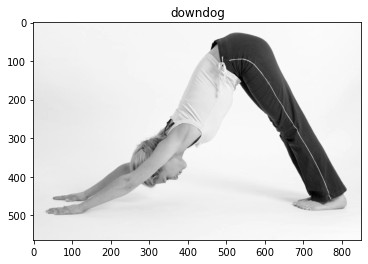

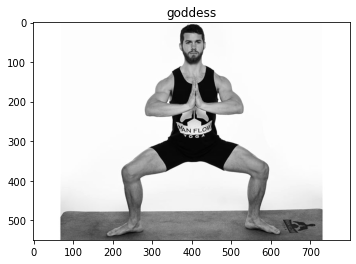

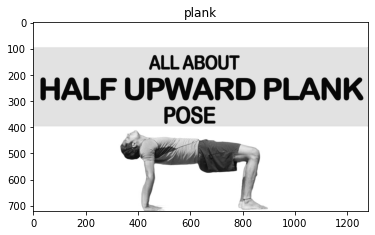

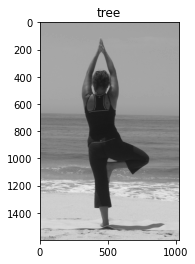

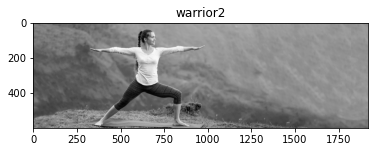

The size of training set is 1001 
(720, 1280)     80
(675, 1200)     28
(360, 480)      22
(957, 1300)     21
(630, 1200)     18
                ..
(1600, 1131)     1
(450, 350)       1
(344, 609)       1
(609, 609)       1
(1224, 1300)     1
Length: 506, dtype: int64


In [56]:
train_images_size=[]
#Storing the dimensions of the training images
for folder in os.listdir("TRAIN"):
    x=0
    files=gb.glob(pathname=str("TRAIN"+"//"+folder+"/*.jpg"))
    for file in files:
        img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        train_images_size.append(img.shape)
        x=x+1
        if x<=1:
            plt.imshow(img, cmap='gray')
            plt.title(folder)
            plt.show()
            
print(f"The size of training set is {len(train_images_size)} ")
print(pd.Series(train_images_size).value_counts())

In [57]:
#Counting the total number of images in the testing set
#And individual labelled images
v=0
for folder in os.listdir("TEST"):
    files=gb.glob(pathname=str("TEST"+"//"+folder+"/*.jpg"))
    x= len(files)
    v=v+x
    print(f"The testing images in folder {folder} is {len(files)} ")
print(f"The total images is {v}")

The testing images in folder downdog is 91 
The testing images in folder goddess is 70 
The testing images in folder plank is 103 
The testing images in folder tree is 65 
The testing images in folder warrior2 is 99 
The total images is 428


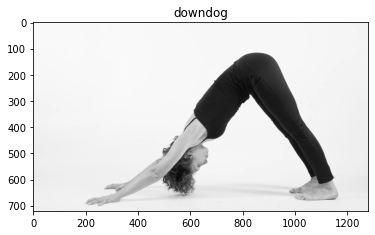

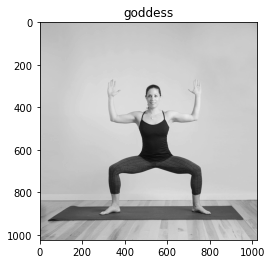

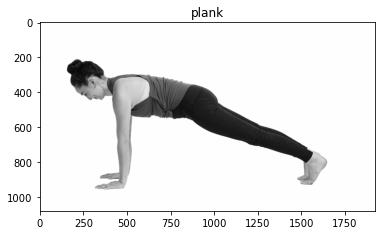

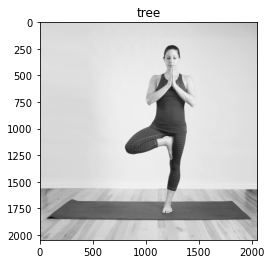

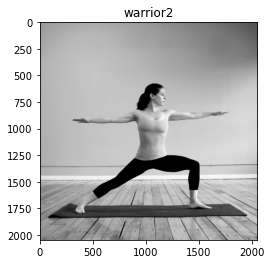

The size of testing set is 428 
(675, 1200)     15
(720, 1280)     14
(630, 1200)      7
(1000, 1500)     7
(1024, 1024)     7
                ..
(1843, 2764)     1
(640, 853)       1
(700, 1150)      1
(231, 397)       1
(581, 740)       1
Length: 249, dtype: int64


In [58]:
#Storing the dimensions of the testing images
test_image_size=[]
for folder in os.listdir("TEST"):
    x=0
    files=gb.glob(pathname=str("TEST"+"//"+folder+"/*.jpg"))
    for file in files:
        img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        test_image_size.append(img.shape)
        x=x+1
        if x<=1:
            plt.imshow(img, cmap='gray')
            plt.title(folder)
            plt.show()

print(f"The size of testing set is {len(test_image_size)} ")
print(pd.Series(test_image_size).value_counts())

In [59]:
#Using ImageDataGenerator to augment the images for both training and testing
img_size=80
train_datagen=ImageDataGenerator(rotation_range=5,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0 )

train_generator=train_datagen.flow_from_directory("TRAIN",
    class_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    target_size=(img_size,img_size)
)

Found 1081 images belonging to 5 classes.


In [60]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0 )
test_generator=train_datagen.flow_from_directory(
    "TEST",
    class_mode='binary',
    color_mode='grayscale',
    batch_size=5,
    target_size=(img_size,img_size)
)

Found 470 images belonging to 5 classes.


In [61]:
#Creting the CNN for a single f
from keras.models import Sequential
import keras
filter_size=(5,5)
model=models.Sequential([
    
    #The first convolutional layer
    layers.Conv2D(64,kernel_size=filter_size,activation='relu',input_shape=(img_size,img_size,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(.2),
    
    
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(.2),
    layers.Dense(512,activation='relu'),
    layers.Dropout(.2),
    
    #Output Layer
    layers.Dense(5,activation='softmax')
])

In [62]:
model_data  = model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 76, 76, 64)        1664      
                                                                 
 batch_normalization_13 (Bat  (None, 76, 76, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 38, 38, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 92416)             0         
                                                                 
 dense_21 (Dense)            (None, 512)              

In [64]:
model_es = EarlyStopping(monitor = 'loss',  patience=5 , verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath =locat_checkpoints, monitor = 'val_categorical_accuracy', save_best_only = True, verbose = 1)

In [65]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
epoch=10
model_data = model.fit(train_generator, 
    epochs=epoch)

Epoch 1/10
 5/34 [===>..........................] - ETA: 18s - loss: 19.4275 - accuracy: 0.2745

C:\Anaconda\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 [==============================] - 22s 624ms/step - loss: 5.6668 - accuracy: 0.3543
Epoch 2/10
34/34 [==============================] - 21s 605ms/step - loss: 1.1517 - accuracy: 0.5476
Epoch 3/10
34/34 [==============================] - 22s 634ms/step - loss: 1.0090 - accuracy: 0.6263
Epoch 4/10
34/34 [==============================] - 21s 611ms/step - loss: 0.8514 - accuracy: 0.6688
Epoch 5/10
34/34 [==============================] - 21s 609ms/step - loss: 0.7819 - accuracy: 0.7253
Epoch 6/10
34/34 [==============================] - 21s 604ms/step - loss: 0.6959 - accuracy: 0.7521
Epoch 7/10
34/34 [==============================] - 21s 611ms/step - loss: 0.5941 - accuracy: 0.7919
Epoch 8/10
34/34 [==============================] - 21s 604ms/step - loss: 0.6301 - accuracy: 0.7817
Epoch 9/10
34/34 [==============================] - 21s 610ms/step - loss: 0.4960 - accuracy: 0.8353
Epoch 10/10
34/34 [==============================] - 21s 629ms/step - loss: 0.4870 - accuracy: 0.8363


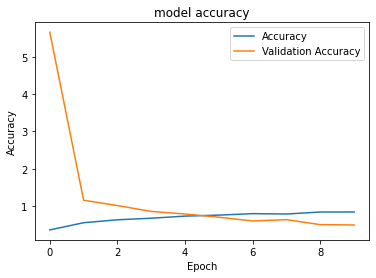

In [76]:
import matplotlib.pyplot as plt
plt.plot(model_data.history["accuracy"])
#plt.plot(model_data.history['val_accuracy'])
plt.plot(model_data.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [72]:
test_accuracy = []

In [73]:
test_accuracy.append(model.evaluate(test_generator))

94/94 [==============================] - 12s 127ms/step - loss: 1.0489 - accuracy: 0.6447


In [77]:
##### ALEXNET IMPLEMENTATION
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_size,img_size,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [78]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 18, 18, 96)        11712     
                                                                 
 batch_normalization_14 (Bat  (None, 18, 18, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 256)         614656    
                                                                 
 batch_normalization_15 (Bat  (None, 8, 8, 256)        1024      
 chNormalization)                                                
                                                      

In [79]:
model2_data = model2.fit(train_generator,
          epochs=50)

Epoch 1/50
34/34 [==============================] - 19s 546ms/step - loss: 2.0791 - accuracy: 0.2091
Epoch 2/50
34/34 [==============================] - 19s 547ms/step - loss: 1.8775 - accuracy: 0.2488
Epoch 3/50
34/34 [==============================] - 19s 550ms/step - loss: 1.8596 - accuracy: 0.2183
Epoch 4/50
34/34 [==============================] - 19s 552ms/step - loss: 1.7522 - accuracy: 0.2507
Epoch 5/50
34/34 [==============================] - 19s 573ms/step - loss: 1.6651 - accuracy: 0.2951
Epoch 6/50
34/34 [==============================] - 19s 561ms/step - loss: 1.6134 - accuracy: 0.3321
Epoch 7/50
34/34 [==============================] - 19s 560ms/step - loss: 1.5666 - accuracy: 0.3478
Epoch 8/50
34/34 [==============================] - 19s 566ms/step - loss: 1.5180 - accuracy: 0.3747
Epoch 9/50
34/34 [==============================] - 19s 555ms/step - loss: 1.4369 - accuracy: 0.3885
Epoch 10/50
34/34 [==============================] - 19s 557ms/step - loss: 1.3950 - accura

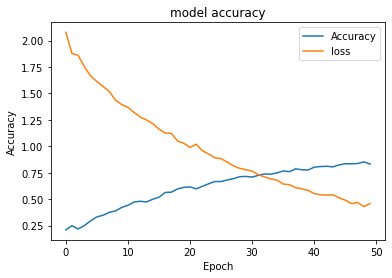

In [82]:
plt.plot(model2_data.history["accuracy"])
#plt.plot(model_data.history['val_accuracy'])
plt.plot(model2_data.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [80]:
test_accuracy.append(model2.evaluate(test_generator))

94/94 [==============================] - 14s 145ms/step - loss: 0.4179 - accuracy: 0.8532


In [110]:
######################### VGG Architecture ###############################
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
model3 = Sequential()
model3.add(Conv2D(input_shape=(img_size,img_size,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [111]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
model3.add(Flatten())
model3.add(Dense(units=4096,activation="relu"))
model3.add(Dense(units=4096,activation="relu"))
model3.add(Dense(units=5, activation="softmax"))

In [112]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [113]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 80, 80, 64)        640       
                                                                 
 conv2d_67 (Conv2D)          (None, 80, 80, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 40, 40, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 conv2d_69 (Conv2D)          (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                

In [ ]:
model3.summary()

In [120]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model3.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= test_generator, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

C:\Users\Raj Pandey\AppData\Local\Temp\ipykernel_16112\3315682456.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model3.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= test_generator, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
100/100 [==============================] - 145s 1s/step - loss: 1.6069 - accuracy: 0.2461 - val_loss: 1.6058 - val_accuracy: 0.2600


In [118]:
model3.fit(train_generator,
          epochs=10)

Epoch 1/10
34/34 [==============================] - 142s 4s/step - loss: 1.6085 - accuracy: 0.2285
Epoch 2/10
34/34 [==============================] - 140s 4s/step - loss: 1.6079 - accuracy: 0.2461
Epoch 3/10
32/34 [===========================>..] - ETA: 8s - loss: 1.6074 - accuracy: 0.2468 

KeyboardInterrupt: 

In [84]:
#CNN with more parameters
#Creting the CNN for a single f
from keras.models import Sequential
import keras
filter_size=(5,5)
model4=models.Sequential([
    
    #The first convolutional layer
    layers.Conv2D(128,kernel_size=filter_size,activation='relu',input_shape=(img_size,img_size,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(.2),
    layers.Conv2D(64,kernel_size=filter_size,activation='relu',padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(.2),
    layers.Conv2D(64,kernel_size=filter_size,activation='relu',padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(.2),
    
    
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(.2),
    layers.Dense(512,activation='relu'),
    layers.Dropout(.2),
    
    #Output Layer
    layers.Dense(5,activation='softmax')
])

In [85]:
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 76, 76, 128)       3328      
                                                                 
 batch_normalization_22 (Bat  (None, 76, 76, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 38, 38, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        204864    
                                                                 
 batch_normalization_23 (Bat  (None, 38, 38, 64)     

In [89]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 76, 76, 128)       3328      
                                                                 
 batch_normalization_22 (Bat  (None, 76, 76, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 38, 38, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        204864    
                                                                 
 batch_normalization_23 (Bat  (None, 38, 38, 64)     

In [94]:
model4_data = model4.fit(train_generator, 
    epochs=10)

Epoch 1/10
34/34 [==============================] - 35s 1s/step - loss: 0.5803 - accuracy: 0.8030
Epoch 2/10
34/34 [==============================] - 35s 1s/step - loss: 0.5683 - accuracy: 0.8020
Epoch 3/10
34/34 [==============================] - 62s 2s/step - loss: 0.5445 - accuracy: 0.7983
Epoch 4/10
34/34 [==============================] - 63s 2s/step - loss: 0.5002 - accuracy: 0.8261
Epoch 5/10
34/34 [==============================] - 63s 2s/step - loss: 0.4109 - accuracy: 0.8566
Epoch 6/10
34/34 [==============================] - 64s 2s/step - loss: 0.3497 - accuracy: 0.8788
Epoch 7/10
34/34 [==============================] - 63s 2s/step - loss: 0.3134 - accuracy: 0.8973
Epoch 8/10
34/34 [==============================] - 64s 2s/step - loss: 0.3141 - accuracy: 0.8964
Epoch 9/10
34/34 [==============================] - 63s 2s/step - loss: 0.3635 - accuracy: 0.8770
Epoch 10/10
34/34 [==============================] - 64s 2s/step - loss: 0.3172 - accuracy: 0.8871


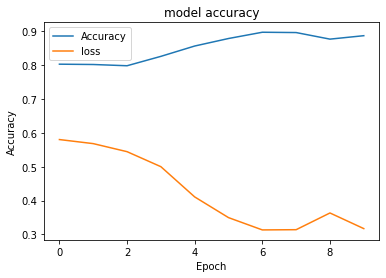

In [97]:
plt.plot(model4_data.history["accuracy"])
#plt.plot(model_data.history['val_accuracy'])
plt.plot(model4_data.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [95]:
test_accuracy.append(model4.evaluate(test_generator))

94/94 [==============================] - 33s 344ms/step - loss: 0.4619 - accuracy: 0.8404


In [96]:
test_accuracy

[[1.048877239227295, 0.6446808576583862],
 [0.41789647936820984, 0.8531914949417114],
 [0.46188148856163025, 0.8404255509376526]]

In [100]:
l1 = ["CNN with One Layer","AlexNET","CNN with Multi_Layer"]
l2 = []

In [101]:
for i in test_accuracy:
    l2.append(i[1])

In [102]:
l2

[0.6446808576583862, 0.8531914949417114, 0.8404255509376526]

<BarContainer object of 3 artists>

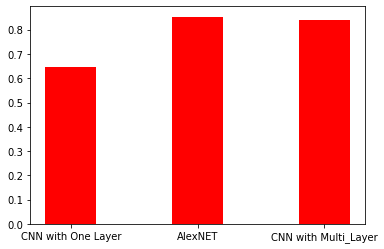

In [121]:
plt.bar(l1, l2, color ='red',
        width = 0.4)